# Forecasting Neural Network - btc

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

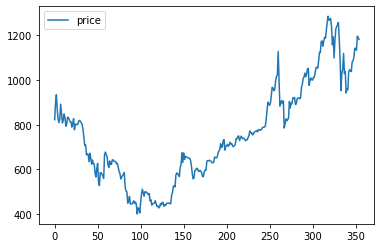

In [3]:
# Importing the dataset
ts = pd.read_csv('btc.csv')
ts.plot()

In [4]:
# Checking Stationarity
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts[['price']])
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))
# Conclusion:  The process has a unit root, the time series is not stationary.

ADF Statistic: -0.579814
p-value: 0.875478
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


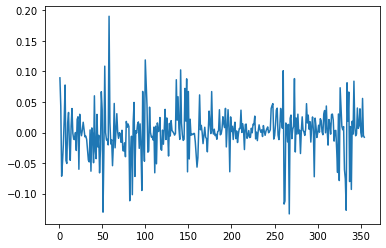

In [5]:
# Feature Scaling
'''Возьмем процентное изменение цены в следующий день'''
ts['y'] = ts[['price']].pct_change()
ts['y'].plot()

In [6]:
# Creating lagged dataset
ts['x1'] = ts[['y']].shift(1)
ts['x2'] = ts[['y']].shift(2)
ts['x3'] = ts[['y']].shift(3)
ts['x4'] = ts[['y']].shift(4)
ts['x5'] = ts[['y']].shift(5)
ts['x6'] = ts[['y']].shift(6)
ts['x7'] = ts[['y']].shift(7)
ts.columns = ['price','y','x1','x2','x3','x4','x5','x6','x7']

In [7]:
ts[:10]

,price,y,x1,x2,x3,x4,x5,x6,x7
0,822.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,896.00,0.089521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,934.21,0.042645,0.089521,NaN,NaN,NaN,NaN,NaN,NaN
3,867.38,-0.071536,0.042645,0.089521,NaN,NaN,NaN,NaN,NaN
4,825.29,-0.048525,-0.071536,0.042645,0.089521,NaN,NaN,NaN,NaN
5,809.17,-0.019533,-0.048525,-0.071536,0.042645,0.089521,NaN,NaN,NaN
6,827.46,0.022603,-0.019533,-0.048525,-0.071536,0.042645,0.089521,NaN,NaN
7,891.85,0.077816,0.022603,-0.019533,-0.048525,-0.071536,0.042645,0.089521,NaN
8,851.00,-0.045804,0.077816,0.022603,-0.019533,-0.048525,-0.071536,0.042645,0.089521
9,807.83,-0.050729,-0.045804,0.077816,0.022603,-0.019533,-0.048525,-0.071536,0.042645


In [8]:
# Splitting the dataset into the Training set and Test set
train_size = int(len(ts[['y']]) * 0.7)
train, test = ts[8:train_size], ts[train_size:]
train_X, train_y = train[['x1','x2','x3','x4','x5','x6','x7']], train[['y']].to_numpy()
test_X, test_y = test[['x1','x2','x3','x4','x5','x6','x7']], test[['y']].to_numpy()

In [9]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kater\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [10]:
# Creating model
#np.random.get_state()[1][0]
np.random.seed(605891282)

# Initialising the ANN
fnn = Sequential()

# Adding the input layer and the first hidden layer
fnn.add(Dense(output_dim = 14, activation = 'tanh', input_dim = 7))

# Adding the second hidden layer
fnn.add(Dense(output_dim = 5, activation = 'linear'))

# Adding the output layer
fnn.add(Dense(output_dim = 1, activation = 'tanh'))

# Compiling the ANN
fnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=7, units=14)`
  if __name__ == '__main__':
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=5)`
  if sys.path[0] == '':
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=1)`
  from ipykernel import kernelapp as app


In [11]:
# Fitting the ANN to the Training set
history = fnn.fit(train_X, train_y, batch_size = 8, validation_data=(test_X, test_y), nb_epoch = 20)

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 240 samples, validate on 107 samples
Epoch 1/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 2/20
240/240 [==============================] - 0s 175us/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 3/20
240/240 [==============================] - 0s 142us/step - loss: 0.0016 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 4/20
240/240 [==============================] - 0s 175us/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 5/20
240/240 [==============================] - 0s 171us/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 6/20
240/240 [==============================] - 0s 171us/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 7/20
240/240 [=======================

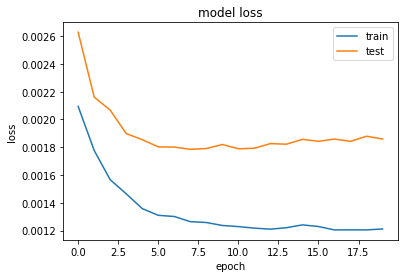

In [12]:
# Plotting loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

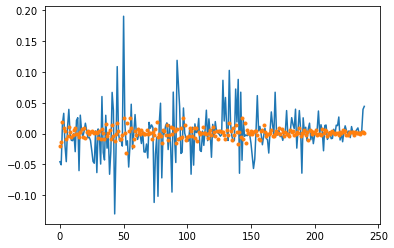

In [13]:
# Predicting scaled training set
yhat = fnn.predict(train_X)
from matplotlib import pyplot
pyplot.plot(train_y)
pyplot.plot(yhat, '.')
pyplot.show()

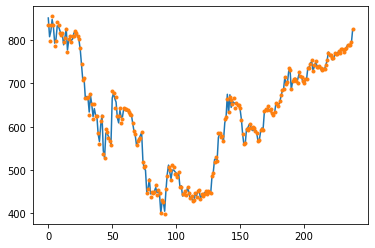

In [14]:
# Inversing scaling
tshat = pd.DataFrame(yhat, columns=['yhat']) 
tshat['history'] = ts['price'][8:247].reset_index()['price']
tshat['pricehat'] = tshat['yhat']*tshat['history'] + tshat['history']

# Plotting
pyplot.plot(tshat['history'])
pyplot.plot(tshat['pricehat'], '.')
pyplot.show()

tshat = tshat[:238]

In [15]:
# Reporting performance
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(tshat['yhat'], tshat['history']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 640.725


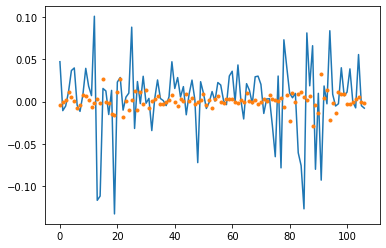

In [16]:
# Predicting scaled test set
X1, y1 = test_X, test_y
yhat1 = fnn.predict(X1)
from matplotlib import pyplot
pyplot.plot(y1)
pyplot.plot(yhat1, '.')
pyplot.show()

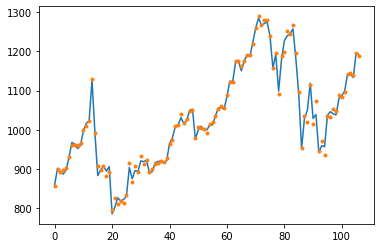

In [17]:
# Inversing scaling
tshat = pd.DataFrame(yhat1, columns=['yhat']) 
tshat['history'] = ts['price'][247:].reset_index()['price']
tshat['pricehat'] = tshat['yhat']*tshat['history'] + tshat['history']

# Plotting
pyplot.plot(tshat['history'])
pyplot.plot(tshat['pricehat'], '.')
pyplot.show()

In [18]:
# Reporting performance
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(tshat['yhat'], tshat['history']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1037.207
